In [10]:
import os
import torch
import torchvision.transforms

import matplotlib.pyplot as plt
import numpy as np

from skimage import io, color
from src import colnet
from src import dataset
from src import utils

In [11]:
model = './model/places10/colnet181211-01-52-21-20.pt'

In [12]:
checkpoint = torch.load(model, map_location=torch.device("cpu"))

net = colnet.ColNet()
net.load_state_dict(checkpoint['model_state_dict'])
net_divisor = checkpoint['net_divisor'] 

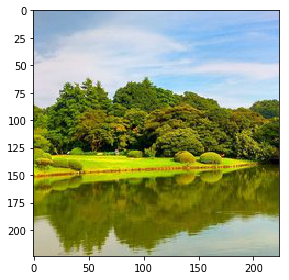

In [13]:
img_path = 'shinjuku-gyoen-square-224.jpg'
img = io.imread(img_path)
io.imshow(img)
io.show()

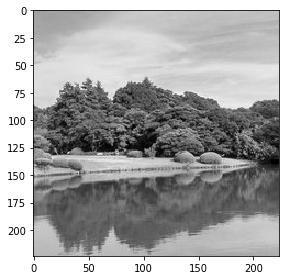

In [14]:
img_gray = color.rgb2gray(img)
io.imshow(img_gray)
io.show()

In [15]:
composed_transforms = torchvision.transforms.Compose(
            [dataset.HandleGrayscale(), 
             dataset.RandomCrop(224),
             dataset.Rgb2LabNorm(), 
             dataset.ToTensor(), 
             dataset.SplitLab()]
        )

In [17]:
L, ab = composed_transforms(img)
L_tensor = torch.from_numpy(np.expand_dims(L, axis=0))

In [20]:
img_name = os.path.basename(img_path)
img_name

'shinjuku-gyoen-square-224.jpg'

/pio/os/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


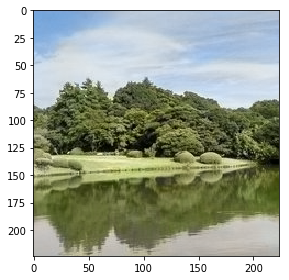

tensor([ 0.6329,  0.0126,  1.2513, -0.2799,  0.7263,  0.9697,  0.1356,  1.2571,
        -0.0659, -0.6201])
tensor([[0.1047, 0.0563, 0.1943, 0.0420, 0.1149, 0.1466, 0.0637, 0.1954, 0.0521,
         0.0299]])
tensor(1.0000)


In [21]:
softmax = torch.nn.Softmax(dim=1)
net.eval()
with torch.no_grad():
    ab_out, classes = net(L_tensor)
    img_colorized = utils.net_out2rgb(L, ab_out[0])
    io.imsave("colorized-" + img_name, img_colorized)
    io.imshow(img_colorized)
    io.show()
    print(classes[0])
    sm = softmax(classes)
    print(sm)
    print(sm.sum())

        